# 6006CEM - Machine Learning and Applications Coursework

Bolade Clara Falebita - SID: 8534428

In [1]:
#Importing all of the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing, model_selection, neighbors
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [2]:
#Dataset is being imported and then displayed.
df = pd.read_csv("melb_data.csv") #DATASET THATS BEING IMPORTED
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


# Pre-processing 

In [3]:
#This shows the features of columns 
df.info()
#SHOWS DATATYPES OF EACH OF COLUMN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.isnull().sum() #SHOW HOW MANY NULL VALUES ARE IN EACH COLUMN

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
df.shape #SHOWS HOW MANY RECORDS AND COLUMNS THERE ARE

(13580, 21)

In [6]:
df = df.dropna() #DROPS ALL THE NULL VALUES

In [7]:
df.shape #SHOWS HOW MANY ARE LEFT

(6196, 21)

In [8]:
df.drop_duplicates() #DROPPING DUPLICATE VALUES

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,07/05/2016,2.5,3067,...,2,0.0,245,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,08/10/2016,2.5,3067,...,1,2.0,256,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000,S,Ray,29/07/2017,35.5,3757,...,2,1.0,972,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170
12206,Williamstown,75 Cecil St,3,h,1050000,VB,Williams,29/07/2017,6.8,3016,...,1,0.0,179,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380
12207,Williamstown,2/29 Dover Rd,1,u,385000,SP,Williams,29/07/2017,6.8,3016,...,1,1.0,0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380
12209,Windsor,201/152 Peel St,2,u,560000,PI,hockingstuart,29/07/2017,4.6,3181,...,1,1.0,0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380


In [9]:
df.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,07/05/2016,2.5,3067,...,2,0.0,245,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019


# Data Analysis

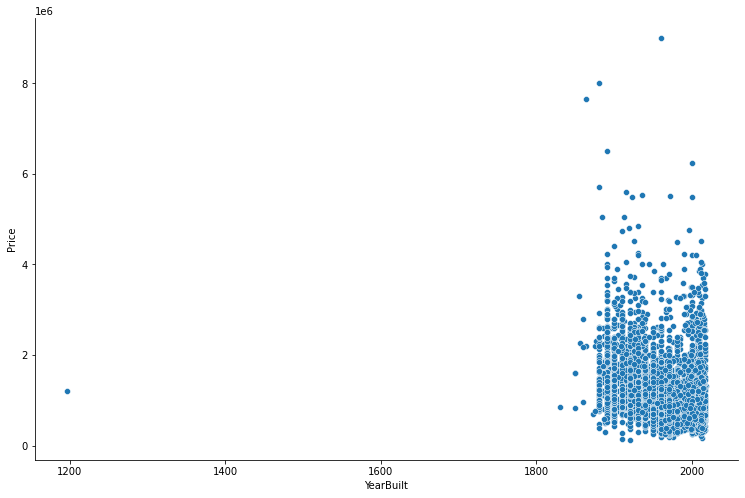

In [10]:
sns.pairplot(df,x_vars=["YearBuilt"], y_vars=["Price"], height=7, aspect=12/8) #SHOWS CORRELATION BETWEEN PRICE AND YEARBUILT

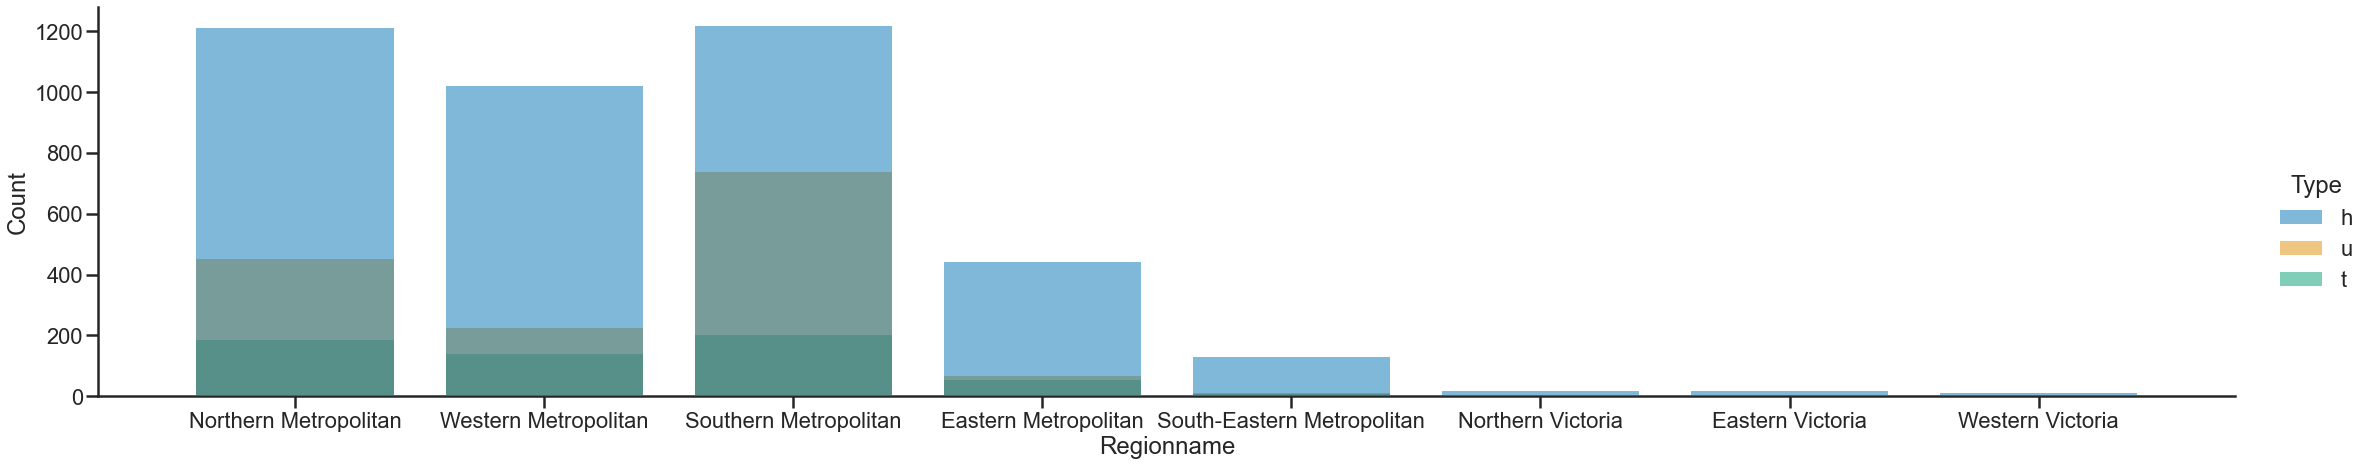

In [11]:
sns.set_style("ticks")
sns.set_context("poster")
sns.displot(x='Regionname', shrink=0.8, hue='Type', data=df, height=7, aspect=32/7, palette='colorblind')

In [12]:
df = df.drop(df[df['YearBuilt'] < 1800].index) #Values under the year 1800 are dropped as they are unusual aka anomalie

In [13]:
df = df[df['Regionname'] != 'Northern Victoria'] #Removing records that include Self employed in the Job column
df = df[df['Regionname'] != 'Eastern Victoria'] #Removing records that include Sales employed in the Job column

#NOT ALOT OF REGIONS THAT I CAN USE TO TRAIN THE MODEL TO ACCURATLY PREDICT PRICE.

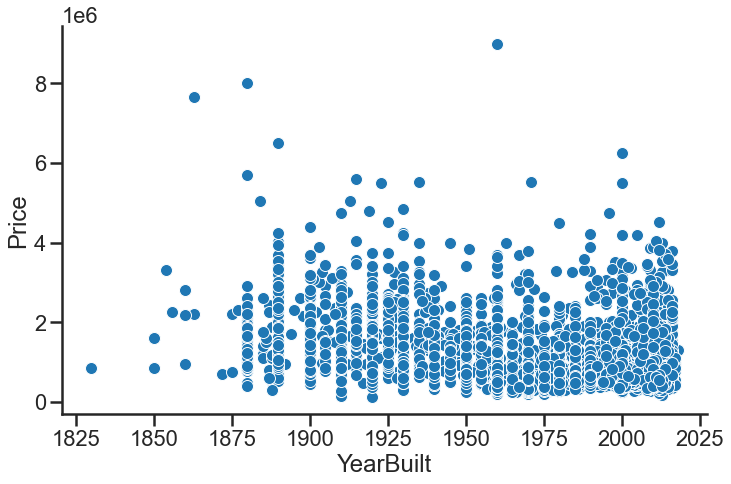

In [14]:
sns.pairplot(df,x_vars=["YearBuilt"], y_vars=["Price"], height=7, aspect=12/8)

In [15]:
#This drops the coloums that are not needed 
df = df.drop(['Suburb','Address','SellerG','Date', 'Postcode', 'Bedroom2', 'CouncilArea', 'Lattitude', 'Longtitude'], axis = 1)

#SOME OF THESE COLOUMNS ARE TO SIMILAIR TO OTHERS 

In [16]:
# Splitting up the type columns
df['Type'].unique()
ReasonDF = pd.get_dummies(df['Type']).reindex(columns={'h':'h','u':'u','t':'t'}, fill_value=0)
df = pd.concat([df, ReasonDF], axis=1)
df = df.drop(columns=['Type'])

In [17]:
# Splitting up the type columns
df['Regionname'].unique()
ReasonDF = pd.get_dummies(df['Regionname']).reindex(columns={'Northern Metropolitan':'Northern Metropolitan','Western Metropolitan':'Western Metropolitan', 'Southern Metropolitan':'Southern Metropolitan','Eastern Metropolitan':'Eastern Metropolitan','South-Eastern Metropolitan':'South-Eastern Metropolitan'}, fill_value=0)
df = pd.concat([df, ReasonDF], axis=1)
df = df.drop(columns=['Regionname'])

In [18]:
# Splitting up the type columns
df['Method'].unique()
ReasonDF = pd.get_dummies(df['Method']).reindex(columns={'S':'S','SP':'SP','VB':'VB', 'PI':'PI', 'SA':'SA'}, fill_value=0)
df = pd.concat([df, ReasonDF], axis=1)
df = df.drop(columns=['Method'])

In [19]:
df.info() #SHOWS THE RESULT OF THE COLOUMS BEING SPLIT

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6153 entries, 1 to 12212
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       6153 non-null   int64  
 1   Price                       6153 non-null   int64  
 2   Distance                    6153 non-null   float64
 3   Bathroom                    6153 non-null   int64  
 4   Car                         6153 non-null   float64
 5   Landsize                    6153 non-null   int64  
 6   BuildingArea                6153 non-null   float64
 7   YearBuilt                   6153 non-null   float64
 8   Propertycount               6153 non-null   int64  
 9   h                           6153 non-null   uint8  
 10  u                           6153 non-null   uint8  
 11  t                           6153 non-null   uint8  
 12  Northern Metropolitan       6153 non-null   uint8  
 13  Western Metropolitan        6153

In [20]:
df = df.astype(np.int64) #CONVERTING DATATYPES INTO INT BC SOME MODELS CAN'T READ OTHER TYPES (PRE-CAUTION)

In [21]:
df.info() #RESULT OF WHAT I HAVE DONE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6153 entries, 1 to 12212
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Rooms                       6153 non-null   int64
 1   Price                       6153 non-null   int64
 2   Distance                    6153 non-null   int64
 3   Bathroom                    6153 non-null   int64
 4   Car                         6153 non-null   int64
 5   Landsize                    6153 non-null   int64
 6   BuildingArea                6153 non-null   int64
 7   YearBuilt                   6153 non-null   int64
 8   Propertycount               6153 non-null   int64
 9   h                           6153 non-null   int64
 10  u                           6153 non-null   int64
 11  t                           6153 non-null   int64
 12  Northern Metropolitan       6153 non-null   int64
 13  Western Metropolitan        6153 non-null   int64
 14  Souther

In [22]:
df = df[['Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount','h','u','t','Northern Metropolitan','Western Metropolitan','Southern Metropolitan','Eastern Metropolitan','South-Eastern Metropolitan','S','SP','VB','PI','SA', 'Price']]
df
#ARRANGED THE COLUMNS SO THAT THE FINAL COLUMN IS OUR Y-COLUMN (PREDICTION COLUMN)

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,h,u,...,Western Metropolitan,Southern Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,S,SP,VB,PI,SA,Price
1,2,2,1,0,156,79,1900,4019,1,0,...,0,0,0,0,1,0,0,0,0,1035000
2,3,2,2,0,134,150,1900,4019,1,0,...,0,0,0,0,0,1,0,0,0,1465000
4,4,2,1,2,120,142,2014,4019,1,0,...,0,0,0,0,0,0,1,0,0,1600000
6,3,2,2,0,245,210,1910,4019,1,0,...,0,0,0,0,1,0,0,0,0,1876000
7,2,2,1,2,256,107,1890,4019,1,0,...,0,0,0,0,1,0,0,0,0,1636000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,3,16,2,1,691,177,1975,2474,1,0,...,0,0,0,0,1,0,0,0,0,635000
12206,3,6,1,0,179,115,1890,6380,1,0,...,1,0,0,0,0,0,1,0,0,1050000
12207,1,6,1,1,0,35,1967,6380,0,1,...,1,0,0,0,0,1,0,0,0,385000
12209,2,4,1,1,0,61,2012,4380,0,1,...,0,1,0,0,0,0,0,1,0,560000


<AxesSubplot:>

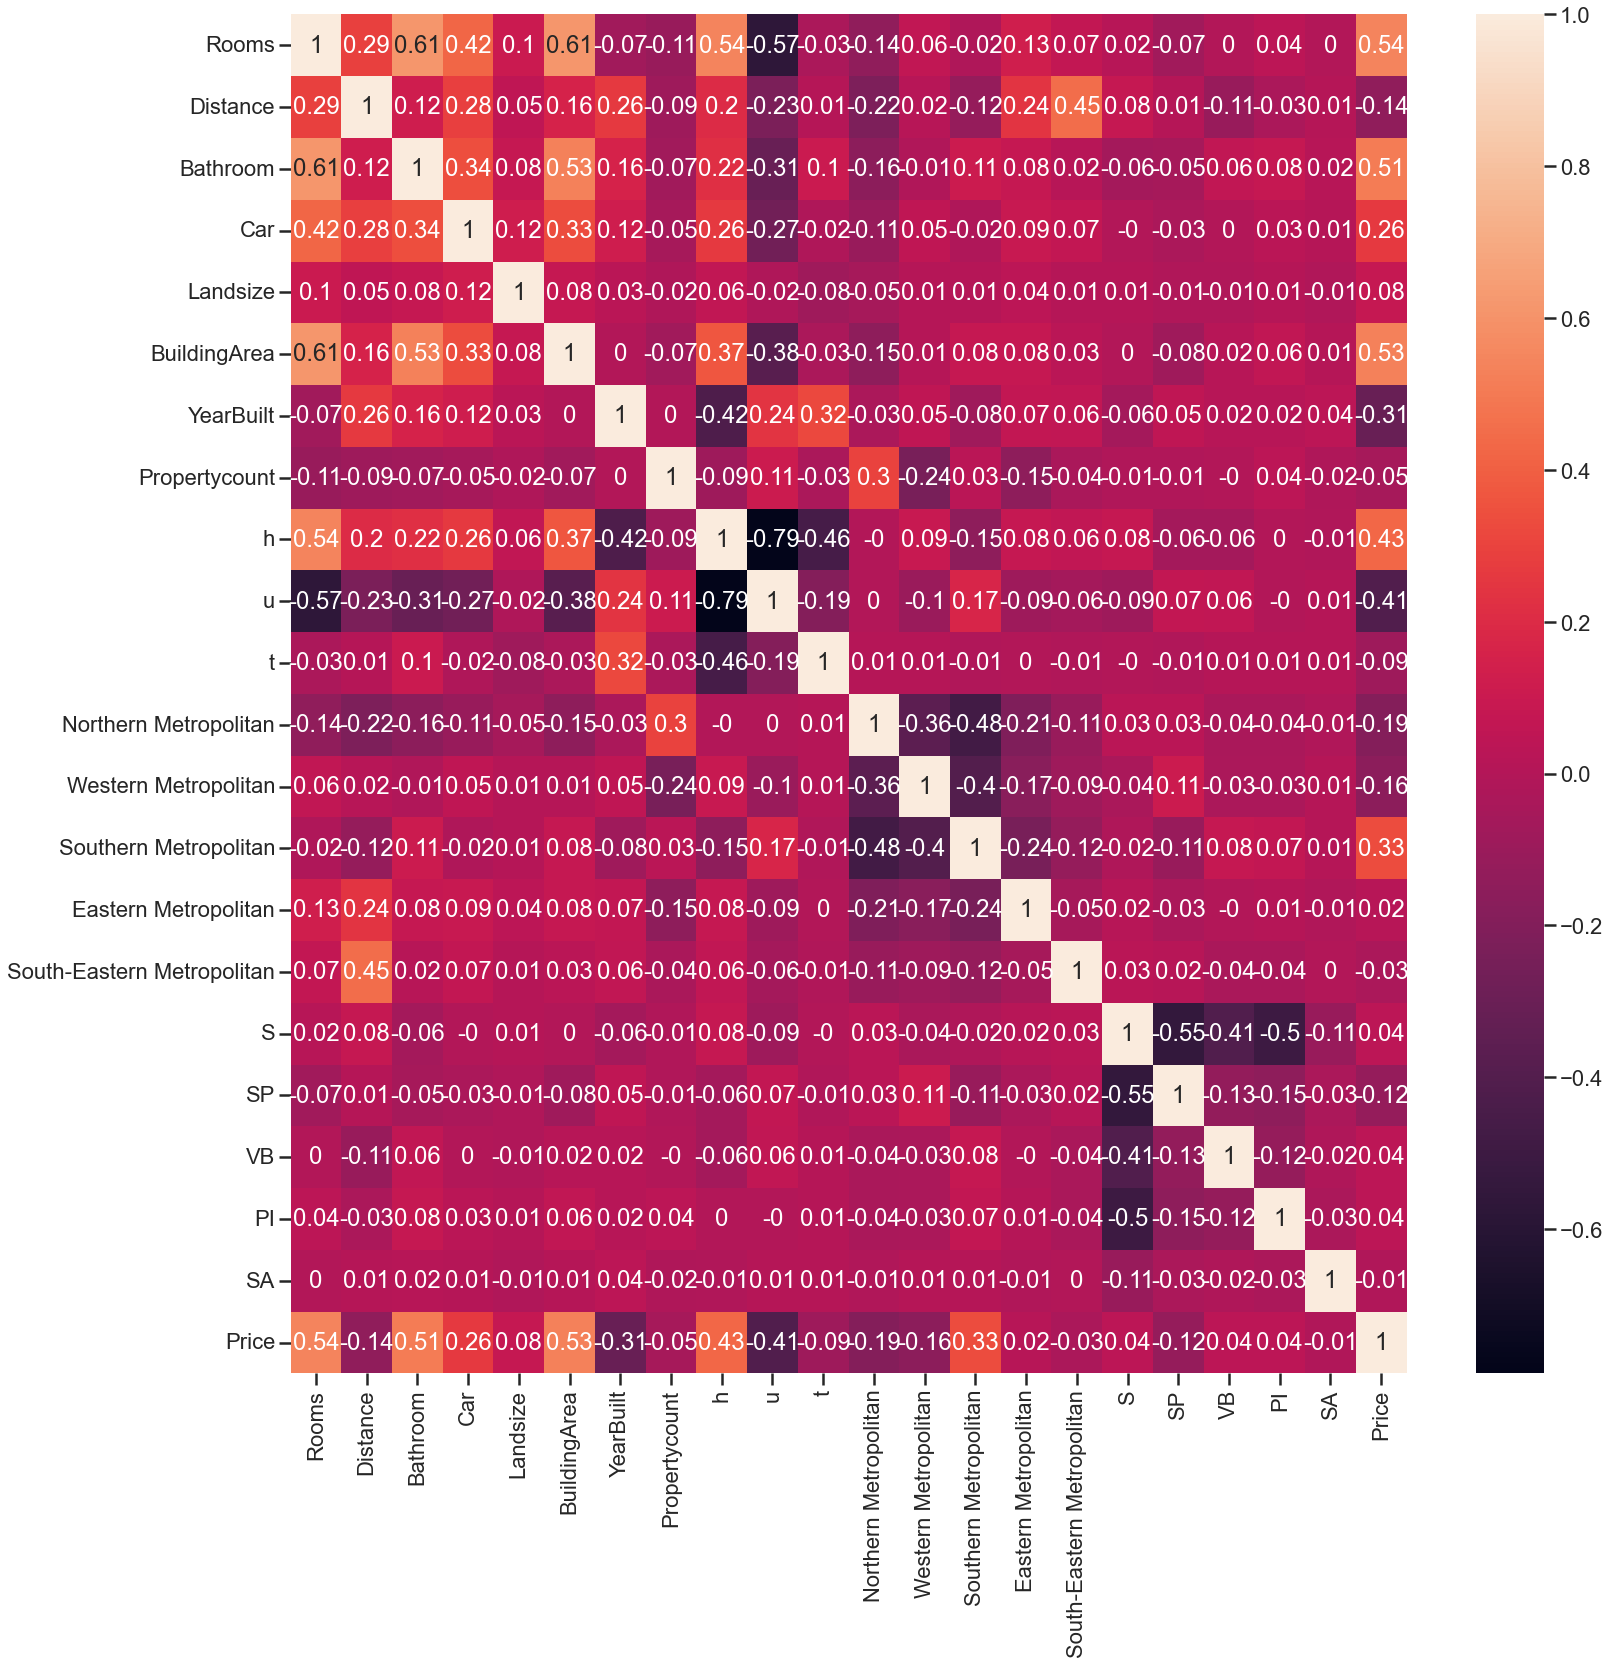

In [23]:
# Creating and plotting the heatmap (This shows us how much each column is correlated to another)
correlation_matrix = df.corr().round(2)
sns.set_context("notebook")
plt.figure(figsize=(25,25))
sns.set_context("poster")
sns.heatmap(correlation_matrix, annot=True)

#CORELLATION MATRIX SHOW THE CORELAATION BETWEEN EACH VARIABLE (THE NUMBER SHOW THE STRENGTH)

# ----------------------------------

# LINEAR REGRESSION WITH NO FEATURE REMOVED

In [24]:
#Splitting dataset into X and y values
X = df.iloc[:,:-1].values #SELECTING ALL THE VALUES EXECPT THE Y (Y=PRICE)
y = df.iloc[:, -1].values #OPPOSITE ^
# Assigning training and test variables 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0) #0.2 MEANS THAT THE TEST SIZE IS 0.2.

#SPLIT THE DATASET INTO X AND Y FOR TRAINING AND TESTING PURPOSESES.

#THIS IS WHERE WE SPLIT THE DATA. 

In [25]:
model = LinearRegression()
model.fit(X_train, y_train) #CALLING LR MODEL WERE FITTING THE MODEL WITH THE TRAINING DATA

train_score = model.score(X_train, y_train) #calculating training score
test_score = model.score(X_test, y_test) #calculating test score
y_test_pred = model.predict(X_test) #calculating prediction score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2') #calculating cross validation score
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error #metrics for regression
print(mean_squared_error(y_test, y_test_pred))      #search up what they do and talk about it
print(mean_absolute_error(y_test, y_test_pred))



Accuracy of Test Data  0.6010396339920474
Accuracy of Train Data  0.6519256632306801
Cross Validation r2 scores  [0.66541077 0.67655045 0.65038989 0.59188942 0.6391613 ]
Average cross validation score  0.644680365445241
196856151985.62866
267028.6357557464


# LINEAR REGRESSION WITH FEATURE SELECTION

In [26]:
# Some values with extremely high correlation are removed
X = df.drop(['Rooms','BuildingArea','SP','PI'], axis = 1).iloc[: ,1:-1 ].values
y = df.iloc[:, -1].values

# Assigning variables to train the model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)


#with this data here, i've selected specific column that will be removed to evaulate the difference. Bc of negative correlation with price, or they are redudant.

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_test_pred = model.predict(X_test)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))


#MENTION DIFFERENCE FROM PREVIOUSE

Accuracy of Test Data  0.5594529975460629
Accuracy of Train Data  0.5427720423515783
Cross Validation r2 scores  [0.54714518 0.5701421  0.59715884 0.46832703 0.52843111]
Average cross validation score  0.5422408523142923
217375947740.5248
302311.78200303816


# LINEAR REGRESSION SCALED

In [28]:
#Standard scaler to make the algorithm work better
#SCALING THE DATA AS THIS MAY IMPROVE THE ACCURARCY/ PREDICTION OF THE MODEL
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_scaled, X_test_scaled, y_train, y_test= model_selection.train_test_split(X, y, test_size=0.2)   #splitting the scaled data into train and test

In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
y_test_pred = model.predict(X_test_scaled)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))


Accuracy of Test Data  0.5492205079301811
Accuracy of Train Data  0.546144387081992
Cross Validation r2 scores  [0.56907825 0.46975287 0.54405324 0.55603079 0.59287485]
Average cross validation score  0.5463579979643787
204379454083.75037
311205.7888925027


# LINEAR REGRESSION WITH OVERSAMPLING

In [30]:
#Oversampling
#random points from the minority class and duplicate them to increase the number of data points in the minority class.” (Chadha, 2021). 
ros = RandomOverSampler() #Calling oversampler
X_ros, y_ros = ros.fit_resample(X, y) #Refitting x and y into sampler
#print(Counter(y_ros)) #Prints count of both outcomes

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.2,random_state=1) #Splits data into training and test set

In [31]:
model = LinearRegression()
model.fit(X_train_ros, y_train_ros)

train_score = model.score(X_train_ros, y_train_ros)
test_score = model.score(X_test_ros, y_test_ros)
y_test_pred = model.predict(X_test_ros)
scores = cross_val_score(model, X_train_ros, y_train_ros, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test_ros, y_test_pred))
print(mean_absolute_error(y_test_ros, y_test_pred))


Accuracy of Test Data  0.593873110973401
Accuracy of Train Data  0.5880705297295338
Cross Validation r2 scores  [0.57900154 0.58830362 0.59271998 0.58793846 0.59136862]
Average cross validation score  0.5878664406988958
350938588388.2866
390355.82966951455


# LINEAR REGRESSION WITH UNDER SAMPLING

In [32]:
#Undersampling
rus = RandomUnderSampler() #Calling undersampler
X_rus, y_rus = rus.fit_resample(X, y) #Refitting X and y into sampled versions
print(Counter(y_rus)) #Printing new count of both predicted outcomes
#Disclaimer may not be able to use this data as this does not have 1000 records after preprocessing

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus,test_size = 0.2,random_state=1)

Counter({131000: 1, 145000: 1, 170000: 1, 185000: 1, 200000: 1, 210000: 1, 216000: 1, 220000: 1, 222000: 1, 227000: 1, 240000: 1, 241000: 1, 248500: 1, 250000: 1, 252000: 1, 256500: 1, 257500: 1, 260000: 1, 265000: 1, 266000: 1, 270000: 1, 272500: 1, 275000: 1, 275500: 1, 279500: 1, 280000: 1, 281000: 1, 282000: 1, 285000: 1, 286000: 1, 288000: 1, 290000: 1, 291000: 1, 292000: 1, 295000: 1, 296000: 1, 300000: 1, 301000: 1, 303500: 1, 305000: 1, 306000: 1, 309000: 1, 310000: 1, 312000: 1, 314000: 1, 315000: 1, 316000: 1, 317500: 1, 319000: 1, 320000: 1, 320500: 1, 323000: 1, 325000: 1, 326000: 1, 327000: 1, 328000: 1, 330000: 1, 331000: 1, 332000: 1, 333000: 1, 335000: 1, 336000: 1, 340000: 1, 341500: 1, 342000: 1, 345000: 1, 346000: 1, 347000: 1, 347500: 1, 348000: 1, 349000: 1, 350000: 1, 351000: 1, 352000: 1, 352500: 1, 353000: 1, 354000: 1, 355000: 1, 357000: 1, 358000: 1, 358500: 1, 360000: 1, 360500: 1, 361000: 1, 362000: 1, 362500: 1, 365000: 1, 366000: 1, 367000: 1, 367500: 1, 3

In [33]:
model = LinearRegression()
model.fit(X_train_rus, y_train_rus)

train_score = model.score(X_train_rus, y_train_rus)
test_score = model.score(X_test_rus, y_test_rus)
y_test_pred = model.predict(X_test_rus)
scores = cross_val_score(model, X_train_rus, y_train_rus, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test_rus, y_test_pred))
print(mean_absolute_error(y_test_rus, y_test_pred))

#MENTION DIFFERENCE FROM PREVIOUS MODEL

Accuracy of Test Data  0.5945550697552828
Accuracy of Train Data  0.5834949715466263
Cross Validation r2 scores  [0.58015752 0.56068477 0.63631689 0.49308841 0.60553845]
Average cross validation score  0.575157208693253
271643000075.47443
377436.2406892749


# -----------------

# LINEAR REGRESSION GRID SEARCH

In [34]:
model = LinearRegression() #Loading up algorithm
modelParam = {
              "fit_intercept": [True, False],
              "n_jobs": ['8']
             }
timeStart = time.time() #Start timer to see how long it takes
gridSearch = GridSearchCV(estimator=model, param_grid = modelParam, cv = 5, n_jobs=-1)
gridResult = gridSearch.fit(X_ros, y_ros) #Fitting data 
gridSearchdf = pd.DataFrame(gridSearch.cv_results_) #Creating dataframe to store cross validated hyperparamters

#Printing the results
print("Linear Regression Grid Search")
print("Grid Search Results")
print(gridSearchdf[['mean_test_score']]) #Printing all hyperparamters used
print("Highest Test Score ", gridResult.best_score_) #Printing best score
print("Hyperparameters used for best score ", gridResult.best_params_) #Printing parameters used to get best score
timeEnd = time.time() #Ending timer
print(round(timeEnd - timeStart, 3), " seconds taken") #Printing time taken

#GRID SEARCH ALLOWS US TO TEST ALL OF THE HYPER PARAMETERS OF A MODEL. TO SEE WHICH YIELDS THE BEST RESULTS

Linear Regression Grid Search
Grid Search Results
   mean_test_score
0       -11.744534
1       -11.744534
Highest Test Score  -11.744533729978443
Hyperparameters used for best score  {'fit_intercept': True, 'n_jobs': '8'}
5.741  seconds taken


# LINEAR REGRESSION RANDOM SEARCH

In [35]:
model = LinearRegression()#Loading up algorithm
modelParam = {
              "fit_intercept": [True, False],
              "n_jobs": ['8']
             }

timeStart = time.time() #Start timer to see how long it takes
randomSearch = RandomizedSearchCV(estimator=model, param_distributions=modelParam, n_iter=3, n_jobs=1, cv=5) #Tweaking search parameters
randomResult = randomSearch.fit(X_ros, y_ros) #Fitting data
randomSearchdf = pd.DataFrame(randomSearch.cv_results_) #Creating dataframe to store cross validated hyperparamters

#Printing results
print("Linear Regression Random Search")
print("Random Search Results")
print(randomSearchdf[['mean_test_score']])#Printing all hyperparamters used
print("Highest Test Score ", randomResult.best_score_)
print("Hyperparameters used for best score ", randomResult.best_params_) #Printing best parameters
timeEnd= time.time()#Ending timer

print(round(timeEnd - timeStart, 3), " seconds taken")

#INSTEAD OF SEARCHING EVERY PARAMETER IT SEARCHES A FEW AT RANDOM
#SOMETIMES IS SIMILAIR GRID SEARCH

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression Random Search
Random Search Results
   mean_test_score
0       -11.744534
1       -11.744534
Highest Test Score  -11.744533729978443
Hyperparameters used for best score  {'n_jobs': '8', 'fit_intercept': True}
0.377  seconds taken


# -----------------------------------------------

# DECISION TREE WITH NO FEATURE REMOVED

#same as before but with decision tree

In [36]:
#Splitting dataset into X and y values
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
# Assigning training and test variables 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [37]:
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_test_pred = model.predict(X_test)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))

Accuracy of Test Data  0.6354843654252663
Accuracy of Train Data  0.9999532276454813
Cross Validation r2 scores  [0.49821749 0.54691403 0.55620806 0.46715788 0.62049514]
Average cross validation score  0.5377985198986523
179860335198.18683
252913.40373679934


# DESCISION TREE WITH FEATURE SELECTION

In [38]:
# Some values with extremely high correlation are removed
X = df.drop(['Rooms','BuildingArea','SP','PI'], axis = 1).iloc[: ,1:-1 ].values
y = df.iloc[:, -1].values

# Assigning variables to train the model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [39]:
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_test_pred = model.predict(X_test)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))

Accuracy of Test Data  0.5622158778503017
Accuracy of Train Data  0.9991936121841657
Cross Validation r2 scores  [ 0.47172407  0.49293742  0.0378864   0.33086502 -0.01398457]
Average cross validation score  0.26388566820982884
216012679527.86615
293798.2818846466


# DECISION TREE SCALED

In [40]:
#Standard scaler to make the algorithm work better
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_scaled, X_test_scaled, y_train, y_test= model_selection.train_test_split(X, y, test_size=0.2)

In [41]:
model = tree.DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
y_test_pred = model.predict(X_test_scaled)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))

Accuracy of Test Data  0.44226987235249504
Accuracy of Train Data  0.9991437911903074
Cross Validation r2 scores  [0.40838693 0.44990324 0.51358827 0.57637298 0.49096479]
Average cross validation score  0.4878432434610199
259018114398.6973
288205.64635797456


# DECISION TREE WITH OVERSAMPLING

In [42]:
#Oversampling
ros = RandomOverSampler() #Calling oversampler
X_ros, y_ros = ros.fit_resample(X, y) #Refitting x and y into sampler
#print(Counter(y_ros)) #Prints count of both outcomes

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.2,random_state=1) #Splits data into training and test set

In [43]:
model = tree.DecisionTreeRegressor()
model.fit(X_train_ros, y_train_ros)

train_score = model.score(X_train_ros, y_train_ros)
test_score = model.score(X_test_ros, y_test_ros)
y_test_pred = model.predict(X_test_ros)
scores = cross_val_score(model, X_train_ros, y_train_ros, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test_ros, y_test_pred))
print(mean_absolute_error(y_test_ros, y_test_pred))

Accuracy of Test Data  0.9957214063917431
Accuracy of Train Data  0.9996891295529831
Cross Validation r2 scores  [0.99142655 0.99662034 0.996855   0.99571547 0.99608943]
Average cross validation score  0.995341358759932
3697178497.015162
6592.801625005676


# DECISION TREE UNDERSAMPLE

In [44]:
#undersampling
ros = RandomUnderSampler() #Calling under
X_ros, y_ros = ros.fit_resample(X, y) #Refitting x and y into sampler
#print(Counter(y_ros)) #Prints count of both outcomes

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.2,random_state=1) #Splits data into training and test set

In [45]:
model = tree.DecisionTreeRegressor()
model.fit(X_train_rus, y_train_rus)

train_score = model.score(X_train_rus, y_train_rus)
test_score = model.score(X_test_rus, y_test_rus)
y_test_pred = model.predict(X_test_rus)
scores = cross_val_score(model, X_train_rus, y_train_rus, cv=5, scoring='r2')
avg = scores.mean()

print("Accuracy of Test Data ", test_score)
print("Accuracy of Train Data ", train_score)
print("Cross Validation r2 scores ", scores)
print("Average cross validation score ", avg)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test_rus, y_test_pred))
print(mean_absolute_error(y_test_rus, y_test_pred))

Accuracy of Test Data  0.2856382837252328
Accuracy of Train Data  0.9998313895154642
Cross Validation r2 scores  [0.51323061 0.10901021 0.2075421  0.31258611 0.24312114]
Average cross validation score  0.2770980325738267
478613358491.9108
448624.6178343949


# DECISION TREE GRID SEARCH

In [46]:
model = tree.DecisionTreeRegressor() #Loading up algorithm
modelParam = {"criterion": ["mse"],"min_samples_split": [5, 10, 15],"max_depth": [2, 6, 8],"min_samples_leaf": [20, 40, 100]}
timeStart = time.time() #Start timer to see how long it takes
gridSearch = GridSearchCV(estimator=model, param_grid = modelParam, cv = 5, n_jobs=-1)
gridResult = gridSearch.fit(X_ros, y_ros) #Fitting data 
gridSearchdf = pd.DataFrame(gridSearch.cv_results_) #Creating dataframe to store cross validated hyperparamters

#Printing the results
print("Decision Tree Grid Search")
print("Grid Search Results")
print(gridSearchdf[['mean_test_score']]) #Printing all hyperparamters used
print("Highest Test Score ", gridResult.best_score_) #Printing best score
print("Hyperparameters used for best score ", gridResult.best_params_) #Printing parameters used to get best score
timeEnd = time.time() #Ending timer
print(round(timeEnd - timeStart, 3), " seconds taken") #Printing time taken

Decision Tree Grid Search
Grid Search Results
    mean_test_score
0        -34.666833
1        -34.666833
2        -34.666833
3        -34.666833
4        -34.666833
5        -34.666833
6        -34.750692
7        -34.750692
8        -34.750692
9        -16.006208
10       -15.991547
11       -16.006208
12       -16.874354
13       -16.874354
14       -16.874354
15       -19.097626
16       -19.097626
17       -19.097626
18       -15.812717
19       -15.812717
20       -15.812717
21       -16.613960
22       -16.613960
23       -16.613960
24       -19.097626
25       -19.097626
26       -19.097626
Highest Test Score  -15.81271699027432
Hyperparameters used for best score  {'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 5}
0.306  seconds taken


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2

# DESCISION TREE RANDOM SEARCH

In [47]:
model = tree.DecisionTreeRegressor()#Loading up algorithm
modelParam = {"criterion": ["mse"],"min_samples_split": [5, 10, 15],"max_depth": [2, 6, 8],"min_samples_leaf": [20, 40, 100]}
timeStart = time.time() #Start timer to see how long it takes
randomSearch = RandomizedSearchCV(estimator=model, param_distributions=modelParam, n_iter=3, n_jobs=1, cv=5) #Tweaking search parameters
randomResult = randomSearch.fit(X_ros, y_ros) #Fitting data
randomSearchdf = pd.DataFrame(randomSearch.cv_results_) #Creating dataframe to store cross validated hyperparamters

#Printing results
print("Decision Tree Random Search")
print("Random Search Results")
print(randomSearchdf[['mean_test_score']])#Printing all hyperparamters used
print("Highest Test Score ", randomResult.best_score_)
print("Hyperparameters used for best score ", randomResult.best_params_) #Printing best parameters
timeEnd= time.time()#Ending timer

print(round(timeEnd - timeStart, 3), " seconds taken")

Decision Tree Random Search
Random Search Results
   mean_test_score
0       -16.613960
1       -16.874354
2       -34.666833
Highest Test Score  -16.613960125945194
Hyperparameters used for best score  {'min_samples_split': 15, 'min_samples_leaf': 40, 'max_depth': 8, 'criterion': 'mse'}
0.053  seconds taken


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2